# Distribución de Probabilidad Poisson
###### https://www.chreinvent.com/recursos/distribuci%C3%B3n-de-poisson
###### https://docs.scipy.org/doc/scipy/tutorial/stats/discrete_poisson.html
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson

In [3]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn.objects as so

+ La variable aleatoria de Poisson cuenta el número de éxitos en n ensayos independientes de Bernoulli en el límite:
    + n -> ∞ y p -> 0
    + donde la probabilidad de éxito en cada ensayo es la esperanza = 𝝀 u 𝝀 >= 0 y es una constante.
* Puede utilizarse para aproximar la variable aleatoria binomial o por sí sola
    + para contar el número de eventos que ocurren en el intervalo
    + para un proceso que satisface ciertas restricciones de “esparcimiento”.

## Poisson en el espacio (no en el tiempo) - Bombas de la segunda guerra mundial
+ Al analizar los impactos de las bombas V-1 en la Segunda Guerra Mundial, el sur de Londres se subdividió en 576 regiones, cada una con área de 0.25 km2. En total, 535 bombas impactaron el área combinada de 576 regiones.
+ a.  Si se selecciona al azar una región, calcule la probabilidad de que haya sido impactada exactamente en dos ocasiones.
    + Sabemos que por definición:Media: μ=λ. 
    + Entonces μ = impactos de bomba / cantidad de regiones
    + μ =535/576 = 0,929

+ b.  Con base en la probabilidad calculada en el inciso a), ¿cuántas de las 576 regiones se esperaría que fueran impactadas exactamente dos veces?
    + P(X) = λ^k e^−λ / k!
    + P(1) =0,929^1 e^−0,929 / 1!
    + P(1) = (e^(-0.929) * 0.929^1) / 1!  ≈ 0.397
+ y luego para k=2
    + P(X) = λ^k e^−λ / k!
    + P(2) =(e^(-0.929) * 0.929^2) / 2!
    + P(2) ≈ 0.276

## Inicio del estudio
+ Para comenzar a trabajar primero definimos los parametros de la muestra
+ Luego definimos y vemos la función de probabilidad Poisson con los parametros del ejemplo.

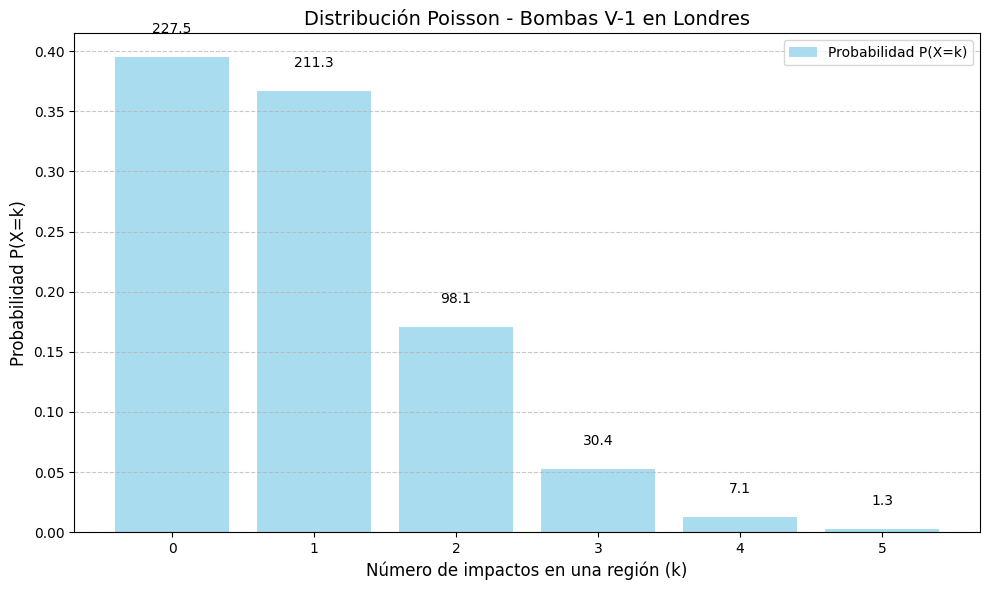

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Datos
total_bombas = 535
total_regiones = 576

# Parámetro lambda (tasa promedio de impactos por región)
lambda_poisson = total_bombas / total_regiones

# Valores de k (número de impactos)
k_values = np.arange(0, 6)  # Consideramos de 0 a 5 impactos
probabilities = poisson.pmf(k_values, lambda_poisson)  # Probabilidad para cada k

# Número esperado de regiones para cada valor de k
expected_regions = probabilities * total_regiones

# Graficamos los resultados
plt.figure(figsize=(10, 6))

# Gráfico de barras para probabilidades
plt.bar(k_values, probabilities, color='skyblue', label='Probabilidad P(X=k)', alpha=0.7)

# Graficamos el número esperado de regiones
for i, regions in enumerate(expected_regions):
    plt.text(k_values[i], probabilities[i] + 0.02, f"{regions:.1f}", ha='center', fontsize=10)

# Configuración del gráfico
plt.title("Distribución Poisson - Bombas V-1 en Londres", fontsize=14)
plt.xlabel("Número de impactos en una región (k)", fontsize=12)
plt.ylabel("Probabilidad P(X=k)", fontsize=12)
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()

# Mostrar gráfica
plt.show()


Probabilidad de exactamente 2 impactos: 0.1704
Número esperado de regiones con exactamente 2 impactos: 98.17


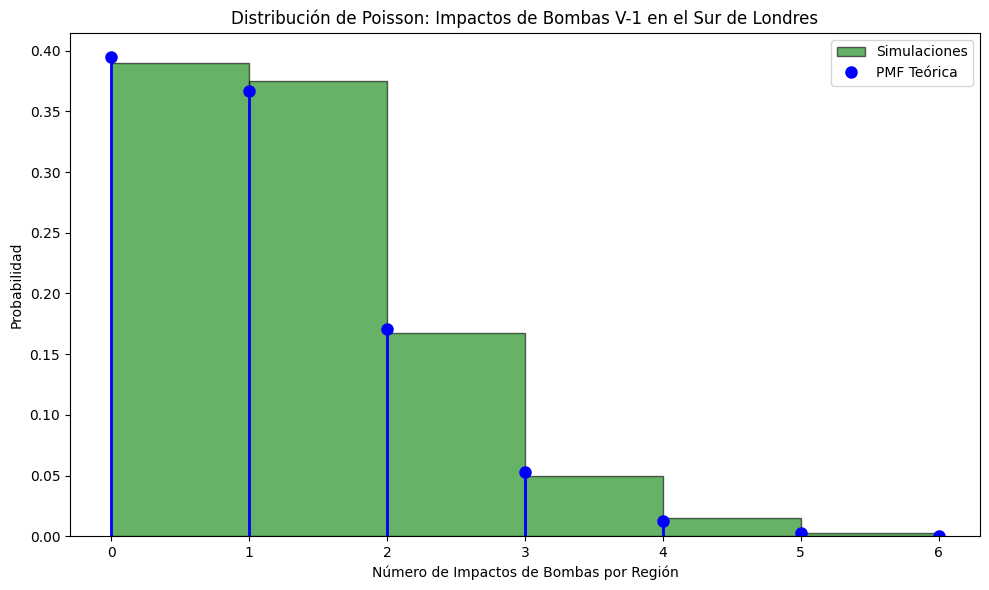

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetros de la distribución de Poisson
lambda_ = 0.929  # Tasa promedio de impacto de bombas por región
k = 2  # Número de impactos

# Función de masa de probabilidad (PMF)
probabilidad_k = poisson.pmf(k, lambda_)

# Calcular el número esperado de regiones con exactamente k impactos
num_regiones = 576
num_esperado = probabilidad_k * num_regiones

print(f'Probabilidad de exactamente {k} impactos: {probabilidad_k:.4f}')
print(f'Número esperado de regiones con exactamente {k} impactos: {num_esperado:.2f}')

# Simulación de datos
n_simulaciones = 10000
simulaciones = poisson.rvs(lambda_, size=n_simulaciones)

# Gráfico de la distribución de Poisson
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(0, max(simulaciones) + 1)
pmf = poisson.pmf(x, lambda_)

# Histogramas y PMF
ax.hist(simulaciones, bins=x, density=True, alpha=0.6, color='g', edgecolor='black', label='Simulaciones')
ax.plot(x, pmf, 'bo', ms=8, label='PMF Teórica')
ax.vlines(x, 0, pmf, colors='b', lw=2)

# Etiquetas y título
ax.set_xlabel('Número de Impactos de Bombas por Región')
ax.set_ylabel('Probabilidad')
ax.set_title('Distribución de Poisson: Impactos de Bombas V-1 en el Sur de Londres')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


___________________________________________________________________________________________________________________________